In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [37]:
# read in main data set for analysis and schema for reference
data = pd.read_csv(r'C:\Users\diack\Downloads\developer_survey_2020\survey_results_public.csv')
schema_data = pd.read_csv(r'C:\Users\diack\Downloads\developer_survey_2020\survey_results_schema.csv')

In [38]:
# familiarization of data
pd.set_option('display.max_columns',None)
data.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",White or of European descent,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work with,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other physical activity;Do other work and come back later,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics);Stack Overflow Jobs (for job seekers),Visit Stack Overflow;Go for a walk or other physical activity,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [53]:
data.shape

(64461, 61)

In [39]:
# checking completeness of data
for column in data.columns:
    pct_complete = 100 - np.mean(data[column].isnull())*100
    print('{} column is ~{:.2f}% full'.format(column,pct_complete))

Respondent column is ~100.00% full
MainBranch column is ~99.54% full
Hobbyist column is ~99.93% full
Age column is ~70.50% full
Age1stCode column is ~89.82% full
CompFreq column is ~62.16% full
CompTotal column is ~54.03% full
ConvertedComp column is ~53.92% full
Country column is ~99.40% full
CurrencyDesc column is ~70.54% full
CurrencySymbol column is ~70.54% full
DatabaseDesireNextYear column is ~68.37% full
DatabaseWorkedWith column is ~76.85% full
DevType column is ~76.59% full
EdLevel column is ~89.09% full
Employment column is ~99.06% full
Ethnicity column is ~71.28% full
Gender column is ~78.43% full
JobFactors column is ~76.56% full
JobSat column is ~70.11% full
JobSeek column is ~80.25% full
LanguageDesireNextYear column is ~83.95% full
LanguageWorkedWith column is ~89.01% full
MiscTechDesireNextYear column is ~65.74% full
MiscTechWorkedWith column is ~62.54% full
NEWCollabToolsDesireNextYear column is ~73.36% full
NEWCollabToolsWorkedWith column is ~82.04% full
NEWDevOps col

In [40]:
# checking for duplicates
data.duplicated().sum()

0

In [41]:
# clarifying what the 'LanguageWorkedWith' column is showing
pd.set_option('display.max_colwidth',None)
schema_data[schema_data['Column'] == 'LanguageWorkedWith']['QuestionText']

22    Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)
Name: QuestionText, dtype: object

In [42]:
# looking at layout of data
data['LanguageWorkedWith'].head(5)

0      C#;HTML/CSS;JavaScript
1            JavaScript;Swift
2    Objective-C;Python;Swift
3                         NaN
4           HTML/CSS;Ruby;SQL
Name: LanguageWorkedWith, dtype: object

In [43]:
# number of nulls
sum(data['LanguageWorkedWith'].isnull())

7083

In [44]:
# counting the the number of occurences each language was entered
from collections import Counter

c = Counter()

for lans in data['LanguageWorkedWith'].dropna():
    lans = lans.split(';')
    for language in lans:
        c.update([language])

# returning top ten most common languages entered
c.most_common(10)

[('JavaScript', 38822),
 ('HTML/CSS', 36181),
 ('SQL', 31413),
 ('Python', 25287),
 ('Java', 23074),
 ('Bash/Shell/PowerShell', 18980),
 ('C#', 18041),
 ('PHP', 15007),
 ('TypeScript', 14578),
 ('C++', 13707)]

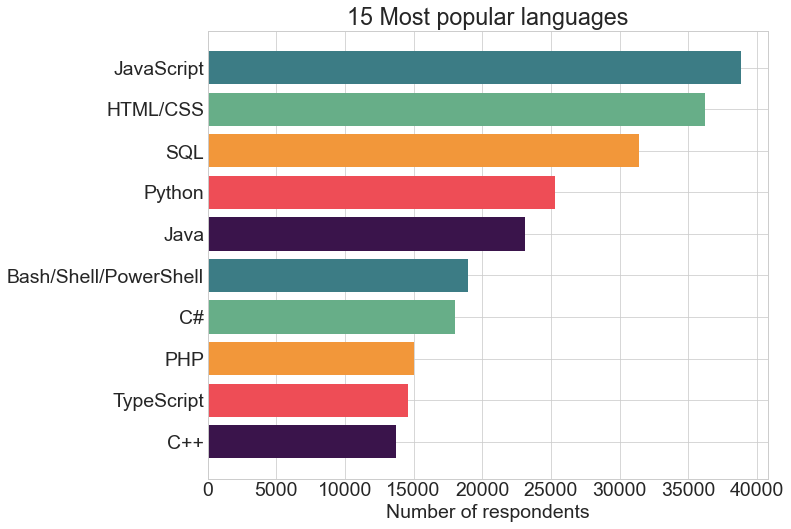

In [45]:
# plotting the top ten languages
language = []
count = []

for tup in c.most_common(10):
    language.append(tup[0])
    count.append(tup[1])

language = language[::-1]
count = count[::-1]

plt.style.use('seaborn-whitegrid')

colors = ['#3a144b','#ee4d56','#f2973a','#67ae88','#3c7c85']
fig = plt.figure(dpi=70,figsize=(10,8))
ax = fig.add_axes([0,0,0.8,0.8])
plt.rc('font', size=20)
ax.barh(language,count,color=colors)
plt.title('15 Most popular languages')
plt.xlabel('Number of respondents')

plt.show()